# 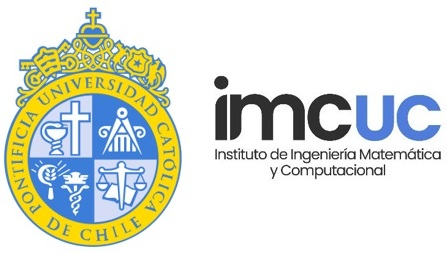  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 04: Trabajo con Datos Semi Estructurados</center></h1>

Este ejercicio busca que los estudiantes aprendan a usar librerias en Python para la gestión y exploración de datos semi estructurados.

## 1. Datos para los ejemplos

Usaremos dos conjuntos de datos para este Notebook:
<ol>
<li>Datos de Yelp sobre restaurantes de Santiago:</li>
    
Estos datos fueron proporcionados por la profesora Paula Aguirre y están en el archivo `restaurants.json` en la carpeta de `data`.

    
<li>Datos de conciertos de la Filarmónica de NY:</li>

La orquesta filarmónica de Nueva York, ha puesto a disposición del público los datos de las más de 20,000 presentaciones que han hecho desde el 7 de diciembre de 1842, contando con una base de más de 180 años de presentaciones. 
    
La base de datos original puede ser accedida en forma interactiva en https://archives.nyphil.org/performancehistory/#program.op y la base completa está disponible en el sitio de GitHub de la Filarmónica: https://github.com/nyphilarchive/PerformanceHistory
</ol>

## 2. Manipulación de datos en formato json

Uno de los formatos preferidos para datos semi estructurados es el formato json. Python cuenta con una libraría especial para trabajar con este tipo de formato: https://docs.python.org/3/library/json.html y nos permite leer y escribir en este formato entre otras cosas.

A continuación cargaremos las librerías necesarias para este ejercicio.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import json

In [2]:
%cd data

C:\Users\rodri\OneDrive\Personal\UC\courses\IMC pregrado\imt2200 introducción a ciencia de datos\lectures\clase 04\data


## 3. Introducción a json

### 3.1 Creando un set de datos simple

Armemos una lista de curso de alumnos en la universidad por generación, incporporando datos adicionales, como profesores y notas cuando estén estas disponibles. Comenzaremos con un `list` en Python para almacenar cada generación.

In [3]:
json_list = [
    { 
        'class': 'Year 1', 
        'student count': 35, 
        'room': 'A2',
        'info': {
            'teachers': { 
                'math': 'Emmy Noether', 
                'physics': 'Richard Feynman' 
            }
        },
        'students': [
            { 
                'name': 'Mary', 
                'sex': 'F', 
                'grades': { 'math': 75, 'physics': 98 } 
            },
            { 
                'name': 'James', 
                'sex': 'M', 
                'grades': { 'math': 80, 'physics': 78 } 
            },
        ]
    },
    { 
        'class': 'Year 2', 
        'student count': 28, 
        'room': 'A4',
        'info': {
            'teachers': { 
                'math': 'Alan Turing', 
                'physics': 'Vera Rubin' 
            }
        },
        'students': [
            { 'name': 'Tony', 'sex': 'M' },
            { 'name': 'Jacqueline', 'sex': 'F' },
        ]
    },
]

In [4]:
json_list[0]

{'class': 'Year 1',
 'student count': 35,
 'room': 'A2',
 'info': {'teachers': {'math': 'Emmy Noether', 'physics': 'Richard Feynman'}},
 'students': [{'name': 'Mary',
   'sex': 'F',
   'grades': {'math': 75, 'physics': 98}},
  {'name': 'James', 'sex': 'M', 'grades': {'math': 80, 'physics': 78}}]}

In [5]:
json_list[0].keys()

dict_keys(['class', 'student count', 'room', 'info', 'students'])

In [6]:
json_list[0]['class']

'Year 1'

In [7]:
json_list[0]['students']

[{'name': 'Mary', 'sex': 'F', 'grades': {'math': 75, 'physics': 98}},
 {'name': 'James', 'sex': 'M', 'grades': {'math': 80, 'physics': 78}}]

Usando Pandas podemos intentar transformar un archivo json en un DataFrame estructurado:

In [8]:
df = pd.DataFrame(json_list)
df.head()

,class,student count,room,info,students
0,Year 1,35,A2,"{'teachers': {'math': 'Emmy Noether', 'physics...","[{'name': 'Mary', 'sex': 'F', 'grades': {'math..."
1,Year 2,28,A4,"{'teachers': {'math': 'Alan Turing', 'physics'...","[{'name': 'Tony', 'sex': 'M'}, {'name': 'Jacqu..."


In [9]:
df['students']

0    [{'name': 'Mary', 'sex': 'F', 'grades': {'math...
1    [{'name': 'Tony', 'sex': 'M'}, {'name': 'Jacqu...
Name: students, dtype: object

In [10]:
df['students'][0]

[{'name': 'Mary', 'sex': 'F', 'grades': {'math': 75, 'physics': 98}},
 {'name': 'James', 'sex': 'M', 'grades': {'math': 80, 'physics': 78}}]

In [11]:
df['students'][0][0]

{'name': 'Mary', 'sex': 'F', 'grades': {'math': 75, 'physics': 98}}

### 3.2 Transformando un json en un DataFrame

El comando anterior no nos generó un DataFrame muy útil, pues muchos de los elementos son diccionarios adentro de una posición.

Una característica común del formato `json`, y es porque los usamos, es que pueden ser anidado: el valor de un atributo pueder ser un nuevo diccionario, o una lista de diccionarios. Este tipo de datos anidados es más conveniente de utilizar en formato "aplanado" o "flattened", de manera que pueda ser almacenado en un DataFrame. La librería `pandas` tiene la función `json_normalize()` que hace exactamente esto por nosotros. Pueden encontrar más detalles en: https://pandas.pydata.org/pandas-docs/version/1.2.0/reference/api/pandas.json_normalize.html

In [12]:
all_students = pd.json_normalize(json_list, sep=".")
type(all_students)

pandas.core.frame.DataFrame

In [13]:
all_students.head()

,class,student count,room,students,info.teachers.math,info.teachers.physics
0,Year 1,35,A2,"[{'name': 'Mary', 'sex': 'F', 'grades': {'math...",Emmy Noether,Richard Feynman
1,Year 2,28,A4,"[{'name': 'Tony', 'sex': 'M'}, {'name': 'Jacqu...",Alan Turing,Vera Rubin


La función `json_normalize` expande automáticamente todos los diccionarios anidados. Si tenemos también listas de diccionarios (como ocurre con `students`), hay que usar el parámetro `path_record` para expandir los diccionarios contenidos dentro de la lista.

In [14]:
all_students = pd.json_normalize(json_list, sep="_", record_path=['students'])
all_students.head()

,name,sex,grades_math,grades_physics
0,Mary,F,75.0,98.0
1,James,M,80.0,78.0
2,Tony,M,NaN,NaN
3,Jacqueline,F,NaN,NaN


Esto nos permitió ordenar por alumno, pero nos quedó afuera mucha información asociada al alumno. Para agregarla debemos indicar, usando el parámetro `meta` la información adicional a copiar.

In [15]:
all_students_grades = pd.json_normalize(json_list, sep="_", record_path=['students'], meta=['class','student count','room','info'], max_level=None)
all_students_grades.head()

,name,sex,grades_math,grades_physics,class,student count,room,info
0,Mary,F,75.0,98.0,Year 1,35,A2,"{'teachers': {'math': 'Emmy Noether', 'physics..."
1,James,M,80.0,78.0,Year 1,35,A2,"{'teachers': {'math': 'Emmy Noether', 'physics..."
2,Tony,M,NaN,NaN,Year 2,28,A4,"{'teachers': {'math': 'Alan Turing', 'physics'..."
3,Jacqueline,F,NaN,NaN,Year 2,28,A4,"{'teachers': {'math': 'Alan Turing', 'physics'..."


Podemos expandir aún más la información, agregando los detalles por profesor.

In [16]:
all_students_grades= pd.json_normalize(json_list, sep="_", record_path=['students'], meta=['class','student count','room',['info','teachers','math'], ['info','teachers','physics']], max_level=None)
all_students_grades.head()

,name,sex,grades_math,grades_physics,class,student count,room,info_teachers_math,info_teachers_physics
0,Mary,F,75.0,98.0,Year 1,35,A2,Emmy Noether,Richard Feynman
1,James,M,80.0,78.0,Year 1,35,A2,Emmy Noether,Richard Feynman
2,Tony,M,NaN,NaN,Year 2,28,A4,Alan Turing,Vera Rubin
3,Jacqueline,F,NaN,NaN,Year 2,28,A4,Alan Turing,Vera Rubin


In [17]:
# almacenar la información bajo este orden en un archivo json
all_students_grades.to_json('students.json')

## 4. Lectura de un archivo json

La librería `json` también nos permite leer este tipo de formato e importar directamente a nuestro código. Hagamos el ejemplo con los datos de restaurantes de santiago de Yelp.

In [18]:
restaurantes = json.load(open('restaurants.json','r'))
type(restaurantes)

dict

In [19]:
restaurantes

{'businesses': [{'id': '8N6Y3HsLXHBeFwhlO0YxwQ',
   'alias': 'barrica-94-santiago',
   'name': 'Barrica 94',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/nuJaODltnNB6J_ww3g-JyA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/barrica-94-santiago?adjust_creative=GWOCZh9-BmZxtdsAjr7Gug&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GWOCZh9-BmZxtdsAjr7Gug',
   'review_count': 72,
   'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'},
    {'alias': 'chilean', 'title': 'Chilean'},
    {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
   'rating': 4.5,
   'coordinates': {'latitude': -33.4342880070125,
    'longitude': -70.6352240592241},
   'transactions': [],
   'price': '$$',
   'location': {'address1': 'Bellavista 052',
    'address2': '',
    'address3': '',
    'city': 'Santiago',
    'zip_code': '8320000',
    'country': 'CL',
    'state': 'RM',
    'display_address': ['Bellavista 052', 'RM 8320000 Santiago', 'Chile']},


In [20]:
restaurantes.keys()

dict_keys(['businesses', 'total', 'region'])

In [21]:
restaurantes['total']

2200

In [22]:
restaurantes['region']

{'center': {'longitude': -70.6256103515625, 'latitude': -33.44387694471913}}

In [23]:
restaurantes['businesses'][0]

{'id': '8N6Y3HsLXHBeFwhlO0YxwQ',
 'alias': 'barrica-94-santiago',
 'name': 'Barrica 94',
 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/nuJaODltnNB6J_ww3g-JyA/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/barrica-94-santiago?adjust_creative=GWOCZh9-BmZxtdsAjr7Gug&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GWOCZh9-BmZxtdsAjr7Gug',
 'review_count': 72,
 'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'},
  {'alias': 'chilean', 'title': 'Chilean'},
  {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
 'rating': 4.5,
 'coordinates': {'latitude': -33.4342880070125,
  'longitude': -70.6352240592241},
 'transactions': [],
 'price': '$$',
 'location': {'address1': 'Bellavista 052',
  'address2': '',
  'address3': '',
  'city': 'Santiago',
  'zip_code': '8320000',
  'country': 'CL',
  'state': 'RM',
  'display_address': ['Bellavista 052', 'RM 8320000 Santiago', 'Chile']},
 'phone': '+5627324939',
 'display_phone': '+56 27324939',
 

In [24]:
df = pd.DataFrame(restaurantes['businesses'])
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,8N6Y3HsLXHBeFwhlO0YxwQ,barrica-94-santiago,Barrica 94,https://s3-media2.fl.yelpcdn.com/bphoto/nuJaOD...,False,https://www.yelp.com/biz/barrica-94-santiago?a...,72,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",4.5,"{'latitude': -33.4342880070125, 'longitude': -...",[],$$,"{'address1': 'Bellavista 052', 'address2': '',...",+5627324939,+56 27324939,1390.184857
1,KQ2D3gs9y0wIuTqoKOHO4w,mestizo-santiago,Mestizo,https://s3-media3.fl.yelpcdn.com/bphoto/XBkpGr...,False,https://www.yelp.com/biz/mestizo-santiago?adju...,52,"[{'alias': 'chilean', 'title': 'Chilean'}, {'a...",4.5,"{'latitude': -33.394083457956, 'longitude': -7...",[],$$$$,"{'address1': 'Av. del Bicentenario 4050', 'add...",+56974776093,+56 9 7477 6093,6024.195625
2,y2FR-JBGie4wiW6RjtKLhg,aquí-está-coco-santiago,Aquí Está Coco,https://s3-media2.fl.yelpcdn.com/bphoto/6IkPzb...,False,https://www.yelp.com/biz/aqu%C3%AD-est%C3%A1-c...,52,"[{'alias': 'seafood', 'title': 'Seafood'}]",4.5,"{'latitude': -33.42406349, 'longitude': -70.61...",[],$$$$,"{'address1': 'La Concepción 236', 'address2': ...",+5624106200,+56 24106200,2355.685975
3,FTnehJpfn5t3iq_eGcE6pg,galindo-santiago,Galindo,https://s3-media2.fl.yelpcdn.com/bphoto/GHOdcj...,False,https://www.yelp.com/biz/galindo-santiago?adju...,57,"[{'alias': 'chilean', 'title': 'Chilean'}, {'a...",4.0,"{'latitude': -33.433069, 'longitude': -70.634928}",[],$$,"{'address1': 'Dardignac 98', 'address2': None,...",+56227770116,+56 2 2777 0116,1480.470569
4,CAFL80wAGOMcPrEO6uMnkA,fuente-alemana-santiago-2,Fuente Alemana,https://s3-media1.fl.yelpcdn.com/bphoto/BqZVmt...,False,https://www.yelp.com/biz/fuente-alemana-santia...,55,"[{'alias': 'sandwiches', 'title': 'Sandwiches'}]",4.5,"{'latitude': -33.4375198417072, 'longitude': -...",[],$$,{'address1': 'Av. Libertador Bernardo O'Higgin...,+5626393231,+56 26393231,1197.179790


## 5. Conciertos de la Filarmónica de NY

Revisemos ahora un archivo JSON más grande, con los datos de los conciertos de la Orquesta Filarmónica de Nueva York. 

El `json` de la filarmónica tiene el siguiente formato:

```
{
  "programs": [
    {
      "id": "38e072a7-8fc9-4f9a-8eac-3957905c0002", // GUID
      "programID": "3853", // NYP Local ID
      "orchestra": "New York Philharmonic",
      "season": "1842-43",
      "concerts": [
        {
           "eventType": "Subscription Season",
           "Location": "Manhattan, NY",
           "Venue": "Apollo Rooms",
           "Date": "1842-12-07T05:00:00Z",
           "Time": "8:00PM"
        },
        /* A program can have multiple concerts */
      ],
      "works": [
        {
          "ID": "8834*4", // e.g. "1234*1" - first part is the Work ID, second part is the NYP Movement ID
          "composerName": "Weber,  Carl  Maria Von",
          "workTitle": "OBERON",
          "movement": "\"Ozean, du Ungeheuer\" (Ocean, thou mighty monster), Reiza (Scene and Aria), Act II",
          "conductorName": "Timm, Henry C.",
          "soloists": [
            {
              "soloistName": "Otto, Antoinette",
              "soloistInstrument": "Soprano",
              "soloistRoles": "S"
            },
            /* more soloists, if applicable. If no soloists, this will be an empty array */
          ]
        },
        /* a program will usually have multiple works */
        {
          "ID": "0*",
          "interval": "Intermission",
          "soloists": []
        },
        /* Intermissions will also appear in the works array */
      ]
    },
    /* more programs */
  ]
}
```

In [25]:
datos_raw = json.load(open('complete.json','r', encoding='UTF-8'))
type(datos_raw)

dict

In [26]:
datos_raw['programs'][0].keys()

dict_keys(['id', 'programID', 'orchestra', 'season', 'concerts', 'works'])

In [27]:
datos_raw['programs'][0]

{'id': '00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1',
 'programID': '3853',
 'orchestra': 'New York Philharmonic',
 'season': '1842-43',
 'concerts': [{'eventType': 'Subscription Season',
   'Location': 'Manhattan, NY',
   'Venue': 'Apollo Rooms',
   'Date': '1842-12-07T05:00:00Z',
   'Time': '8:00PM'}],
 'works': [{'ID': '52446*',
   'composerName': 'Beethoven,  Ludwig  van',
   'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP.67',
   'conductorName': 'Hill, Ureli Corelli',
   'soloists': []},
  {'ID': '8834*4',
   'composerName': 'Weber,  Carl  Maria Von',
   'workTitle': 'OBERON',
   'movement': '"Ozean, du Ungeheuer" (Ocean, thou mighty monster), Reiza (Scene and Aria), Act II',
   'conductorName': 'Timm, Henry C.',
   'soloists': [{'soloistName': 'Otto, Antoinette',
     'soloistInstrument': 'Soprano',
     'soloistRoles': 'S'}]},
  {'ID': '3642*',
   'composerName': 'Hummel,  Johann',
   'workTitle': 'QUINTET, PIANO, D MINOR, OP. 74',
   'soloists': [{'soloistName': 'Scharfenberg, Willia

In [28]:
datos_raw['programs'][0]['concerts']

[{'eventType': 'Subscription Season',
  'Location': 'Manhattan, NY',
  'Venue': 'Apollo Rooms',
  'Date': '1842-12-07T05:00:00Z',
  'Time': '8:00PM'}]

In [29]:
datos_raw['programs'][0]['works']

[{'ID': '52446*',
  'composerName': 'Beethoven,  Ludwig  van',
  'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP.67',
  'conductorName': 'Hill, Ureli Corelli',
  'soloists': []},
 {'ID': '8834*4',
  'composerName': 'Weber,  Carl  Maria Von',
  'workTitle': 'OBERON',
  'movement': '"Ozean, du Ungeheuer" (Ocean, thou mighty monster), Reiza (Scene and Aria), Act II',
  'conductorName': 'Timm, Henry C.',
  'soloists': [{'soloistName': 'Otto, Antoinette',
    'soloistInstrument': 'Soprano',
    'soloistRoles': 'S'}]},
 {'ID': '3642*',
  'composerName': 'Hummel,  Johann',
  'workTitle': 'QUINTET, PIANO, D MINOR, OP. 74',
  'soloists': [{'soloistName': 'Scharfenberg, William',
    'soloistInstrument': 'Piano',
    'soloistRoles': 'A'},
   {'soloistName': 'Hill, Ureli Corelli',
    'soloistInstrument': 'Violin',
    'soloistRoles': 'A'},
   {'soloistName': 'Derwort, G. H.',
    'soloistInstrument': 'Viola',
    'soloistRoles': 'A'},
   {'soloistName': 'Boucher, Alfred',
    'soloistInstrument': 'C

In [30]:
# tratemos de crear un DataFrame
nycphil = pd.json_normalize(datos_raw['programs'])
nycphil.head()

,id,programID,orchestra,season,concerts,works
0,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,3853,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52446*', 'composerName': 'Beethoven, ..."
1,1118e84e-eb59-46cc-9119-d903375e65e6-0.1,5178,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52437*', 'composerName': 'Beethoven, ..."
2,08536612-27c3-437e-9b44-def21034b06c-0.1,10785,Musicians from the New York Philharmonic,1842-43,"[{'eventType': 'Special', 'Location': 'Manhatt...","[{'ID': '52364*1', 'composerName': 'Beethoven,..."
3,81a3b8de-1737-4c9e-9318-b839f7c7c4c0-0.1,5887,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52434*', 'composerName': 'Beethoven, ..."
4,09581bb7-8855-4965-b302-fc54cc669041-0.1,305,New York Philharmonic,1843-44,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52453*', 'composerName': 'Beethoven, ..."


Vemos dos columnas que tienen datos anidados. Usemos la función `json_normalize` para desempacar la columna de conciertos en un nuevo DataFrame

In [31]:
concert_data = pd.json_normalize(data=datos_raw['programs'], record_path='concerts', meta=['id', 'orchestra','programID', 'season'])
concert_data.head()

,eventType,Location,Venue,Date,Time,id,orchestra,programID,season
0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43
1,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18T05:00:00Z,8:00PM,1118e84e-eb59-46cc-9119-d903375e65e6-0.1,New York Philharmonic,5178,1842-43
2,Special,"Manhattan, NY",Apollo Rooms,1843-04-07T05:00:00Z,8:00PM,08536612-27c3-437e-9b44-def21034b06c-0.1,Musicians from the New York Philharmonic,10785,1842-43
3,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22T05:00:00Z,8:00PM,81a3b8de-1737-4c9e-9318-b839f7c7c4c0-0.1,New York Philharmonic,5887,1842-43
4,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-11-18T05:00:00Z,None,09581bb7-8855-4965-b302-fc54cc669041-0.1,New York Philharmonic,305,1843-44


¿Cuántos conciertos han realizado desde el 7 de diciembre de 1842?

In [32]:
len(concert_data)

22525

<div class="alert alert-block alert-info">
<b> Desafío:</b> Convierta el archivo `json` en un DataFrame aplanado centrado en `works` y conteste: ¿cuál es el compositor del que más piezas ha tocado la Filarmónica de NY en estos 181 años de datos?
    
<b> Las tres primeras respuestas correctas tienen +0.1 en la Tarea 1.</b>
</div>

#### Posible forma de abordar el problema

La siguiente es la respuesta entergada por Benjamín Ubilla a esta pregunta, mostrando que el compositor más tocado por la Orquesta es Richard Wagner:

In [33]:
table = pd.json_normalize(datos_raw["programs"], record_path="works")
table

,ID,composerName,workTitle,conductorName,soloists,movement,interval,movement._,movement.em,workTitle._,workTitle.em
0,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",[],NaN,NaN,NaN,NaN,NaN,NaN
1,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.","[{'soloistName': 'Otto, Antoinette', 'soloistI...","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,NaN,NaN
2,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,"[{'soloistName': 'Scharfenberg, William', 'sol...",NaN,NaN,NaN,NaN,NaN,NaN
3,0*,NaN,NaN,NaN,[],NaN,Intermission,NaN,NaN,NaN,NaN
4,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",[],Overture,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
86003,3461*,"Brahms, Johannes","TRIO, PIANO, VIOLIN, CELLO, NO. 2, C MAJOR, OP...",NaN,"[{'soloistName': 'Ge, Quan', 'soloistInstrumen...",NaN,NaN,NaN,NaN,NaN,NaN
86004,50159*,"Berio, Luciano",LA RITIRATA NOTTURNA DI MADRID,"Salonen, Esa-Pekka",[],NaN,NaN,NaN,NaN,NaN,NaN
86005,13404*,"Salonen, Esa-Pekka",KINEMA,"Salonen, Esa-Pekka","[{'soloistName': 'McGill, Anthony', 'soloistIn...",NaN,NaN,NaN,NaN,NaN,NaN
86006,0*,NaN,NaN,NaN,[],NaN,Intermission,NaN,NaN,NaN,NaN


In [34]:
table["composerName"].value_counts()

Wagner,  Richard               4985
Beethoven,  Ludwig  van        4643
Tchaikovsky,  Pyotr  Ilyich    3793
Mozart,  Wolfgang  Amadeus     2751
Brahms,  Johannes              2611
                               ... 
Redman,  Donald  Matthew          1
Oliveros,  Pauline                1
Bowles,  Paul                     1
Loeb,  John  Jacob                1
Wyner,  Yehudi                    1
Name: composerName, Length: 3017, dtype: int64

In [35]:
table["composerName"].value_counts().idxmax()

'Wagner,  Richard'